In [1]:


from mlflow.tracking import MlflowClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from itables import show
import plotly.express as px

from developability import data as data_
from developability.utils import ls
from developability.mlflow_tools import *
from tqdm.notebook import tqdm

## retina display
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

%load_ext autoreload
%autoreload 2

# paths 

data_path = Path(data_.__path__[0])

### Load Data 

In [2]:
data_path = Path(data_.__path__[0])
training_path = data_path / 'train'
data = pd.read_parquet(training_path/'Therapeutic_and_internal_antibodies.parquet')
data.head()

,HeparinRRT,Project,HCDR1_APBS_pos,HCDR1_APBS_neg,HCDR1_APBS_net,HCDR2_APBS_pos,HCDR2_APBS_neg,HCDR2_APBS_net,HCDR3_APBS_pos,HCDR3_APBS_neg,HCDR3_APBS_net,HFR1_APBS_pos,HFR1_APBS_neg,HFR1_APBS_net,HFR2_APBS_pos,HFR2_APBS_neg,HFR2_APBS_net,HFR3_APBS_pos,HFR3_APBS_neg,HFR3_APBS_net,HFR4_APBS_pos,HFR4_APBS_neg,HFR4_APBS_net,LCDR1_APBS_pos,LCDR1_APBS_neg,LCDR1_APBS_net,LCDR2_APBS_pos,LCDR2_APBS_neg,LCDR2_APBS_net,LCDR3_APBS_pos,LCDR3_APBS_neg,LCDR3_APBS_net,LFR1_APBS_pos,LFR1_APBS_neg,LFR1_APBS_net,LFR2_APBS_pos,LFR2_APBS_neg,LFR2_APBS_net,LFR3_APBS_pos,LFR3_APBS_neg,LFR3_APBS_net,LFR4_APBS_pos,LFR4_APBS_neg,LFR4_APBS_net,HCDR_APBS_pos,HCDR_APBS_neg,HCDR_APBS_net,LCDR_APBS_pos,LCDR_APBS_neg,LCDR_APBS_net,HFR_APBS_pos,HFR_APBS_neg,HFR_APBS_net,LFR_APBS_pos,LFR_APBS_neg,LFR_APBS_net,HC_APBS_pos,HC_APBS_neg,HC_APBS_net,LC_APBS_pos,LC_APBS_neg,LC_APBS_net,TOTAL_CDR_APBS_pos,TOTAL_CDR_APBS_neg,TOTAL_CDR_APBS_net,TOTAL_FR_APBS_pos,TOTAL_FR_APBS_neg,TOTAL_FR_APBS_net,TOTAL_APBS_pos,TOTAL_APBS_neg,TOTAL_APBS_net
antibody,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
adalimumab,0.79,Therapeutic,361.422343,-794.503791,-433.081449,1555.624126,-4014.715450,-2459.091324,2875.086488,-138.003294,2737.083194,5376.458039,-1771.257720,3605.200319,2726.475633,-584.411432,2142.064200,3398.963679,-1368.871898,2030.091781,905.524940,-973.487817,-67.962877,7088.950311,-2.623292,7086.327019,1842.767512,0.000000,1842.767512,3232.607354,-34.553594,3198.053760,5204.403827,-935.352752,4269.051075,6533.142402,-21.319271,6511.823132,6140.552634,-104.698825,6035.853809,1542.070672,-1031.505891,510.564781,4792.132957,-4947.222536,-155.089579,12164.325177,-37.176886,12127.148291,12407.422291,-4698.028867,7709.393424,19420.169535,-2092.876739,17327.292796,17199.555248,-9645.251403,7554.303845,31584.494712,-2130.053625,29454.441087,16956.458134,-4984.399421,11972.058712,31827.591826,-6790.905606,25036.686220,48784.049960,-11775.305027,37008.744932
daclizumab,0.84,Therapeutic,4252.553904,0.000000,4252.553904,4452.876492,-904.794295,3548.082197,3911.936888,0.000000,3911.936888,14311.015341,-193.586163,14117.429178,1868.888108,-38.688851,1830.199256,4672.451210,-414.558541,4257.892669,1996.455362,-125.736264,1870.719098,2912.056050,-214.503158,2697.552891,2848.982419,0.000000,2848.982419,6021.840255,0.000000,6021.840255,3227.953846,-1014.915103,2213.038743,10027.781235,0.000000,10027.781235,8142.327827,-283.031831,7859.295996,1246.512062,-635.948490,610.563573,12617.367283,-904.794295,11712.572988,11782.878723,-214.503158,11568.375565,22848.810021,-772.569820,22076.240201,22644.574971,-1933.895424,20710.679547,35466.177304,-1677.364115,33788.813190,34427.453694,-2148.398582,32279.055112,24400.246007,-1119.297454,23280.948553,45493.384992,-2706.465243,42786.919748,69893.630999,-3825.762697,66067.868302
ganitumab,0.79,Therapeutic,1818.147090,0.000000,1818.147090,6910.914448,0.000000,6910.914448,2961.303964,-484.904947,2476.399018,10333.605343,-525.798048,9807.807295,2872.797423,-281.600949,2591.196475,11761.616999,-147.382398,11614.234601,360.371905,-1259.033101,-898.661196,4405.906664,-170.769361,4235.137303,2334.634695,0.000000,2334.634695,1148.865688,-288.326494,860.539194,3364.619614,-1193.814546,2170.805067,620.200783,-1222.838265,-602.637481,3967.226838,-3170.419029,796.807809,1430.429745,-791.895867,638.533878,11690.365502,-484.904947,11205.460556,7889.407047,-459.095855,7430.311192,25328.391670,-2213.814495,23114.577175,9382.476980,-6378.967707,3003.509273,37018.757173,-2698.719442,34320.037731,17271.884027,-6838.063562,10433.820465,19579.772550,-944.000802,18635.771748,34710.868651,-8592.782203,26118.086448,54290.641200,-9536.783004,44753.858196
vedolizumab,0.54,Therapeutic,0.000000,-2649.100853,-2649.100853,4492.540426,-5860.854936,-1368.314511,0.000000,-6989.631169,-6989.631169,6391.205916,-986.398297,5404.807619,3360.681228,0.000000,3360.681228,3163.553567,-2239.208472,924.345095,306.504321,-1241.789054,-935.284733,3087.786259,-636.6

### Connect to client and list experiments

In [3]:
client = MlflowClient(tracking_uri = 'http://127.0.0.1:5000')
exps = client.search_experiments()

def keep(name): 
    words = ['Normalization', 'PCA', 'Conditional']
    for word in words: 
        if word in name:
            return True
    return False

# list the name of desired experiments. 
experiments = {}
for i, exp in enumerate(exps):
    if keep(exp.name):
        df = runs_to_dataframe(client.search_runs(experiment_ids = exp.experiment_id))
        df.insert(0, 'experiment_name', exp.name)
        experiments[exp.name] = df
        print(i, exp.experiment_id,'\t',  exp.name)
        

0 774817144151895142 	 RegressionWithRowNormalization1
1 968210472893656467 	 RegressionWithPCA1
2 163746521336102013 	 RegressionWithConditionalInterceptAndSlope1
3 379577206985480093 	 RegressionWithConditionalIntercept1


### Plot cross validation data for each experiment. 

##### Regression with conditional Intercept 1 


In [4]:
def clean_columns(df): 
    return df.rename(columns ={col:col.split('.')[-1] for col in df.columns})

def extract_exp_type(s): 
    if 'row' in s.lower(): 
        return 'Normalization'
    elif 'pca' in s.lower(): 
        return 'PCA'
    elif 'conditional' in s.lower() and 'slope' in s.lower():
        return 'Conditional intercept/slope'
    elif 'conditional' in s.lower():
        return 'Conditional intercept'
    else: 
        return 'Unknown'
    

In [5]:
metadata = pd.concat(list(experiments.values()))
metadata['tags.feature_set'] = metadata['tags.feature_set'].str.replace('postive_cdr', 'positive_cdr')

metadata['Project'] = metadata['tags.Description'].str.split(' ').str.get(-1)
metadata['Experiment Type'] = metadata['tags.Description'].apply(extract_exp_type)


prefixes = ['Experiment', 'Project', 'tags.model', 'tags.feature_set', 'metrics']
metadata2 = clean_columns(get_columns(metadata, prefixes = prefixes, exclude = ['sem', 'mean']))

show(metadata2)

### Plot R2 Versus RMSE for Test CV. 

Below I plot the R2 versus the RMSE. This is evaluated using 10x Repeated 5 Fold CV. We see a very relationship between the two values for different feature processing methods (experiment Type) and projects. Note that we see the best RMSE (lowest) when therapeutics are held out but reduced R2. So the therapeutic antibodies increase diversity allowing the model to explain the variance but are also harder to classify.

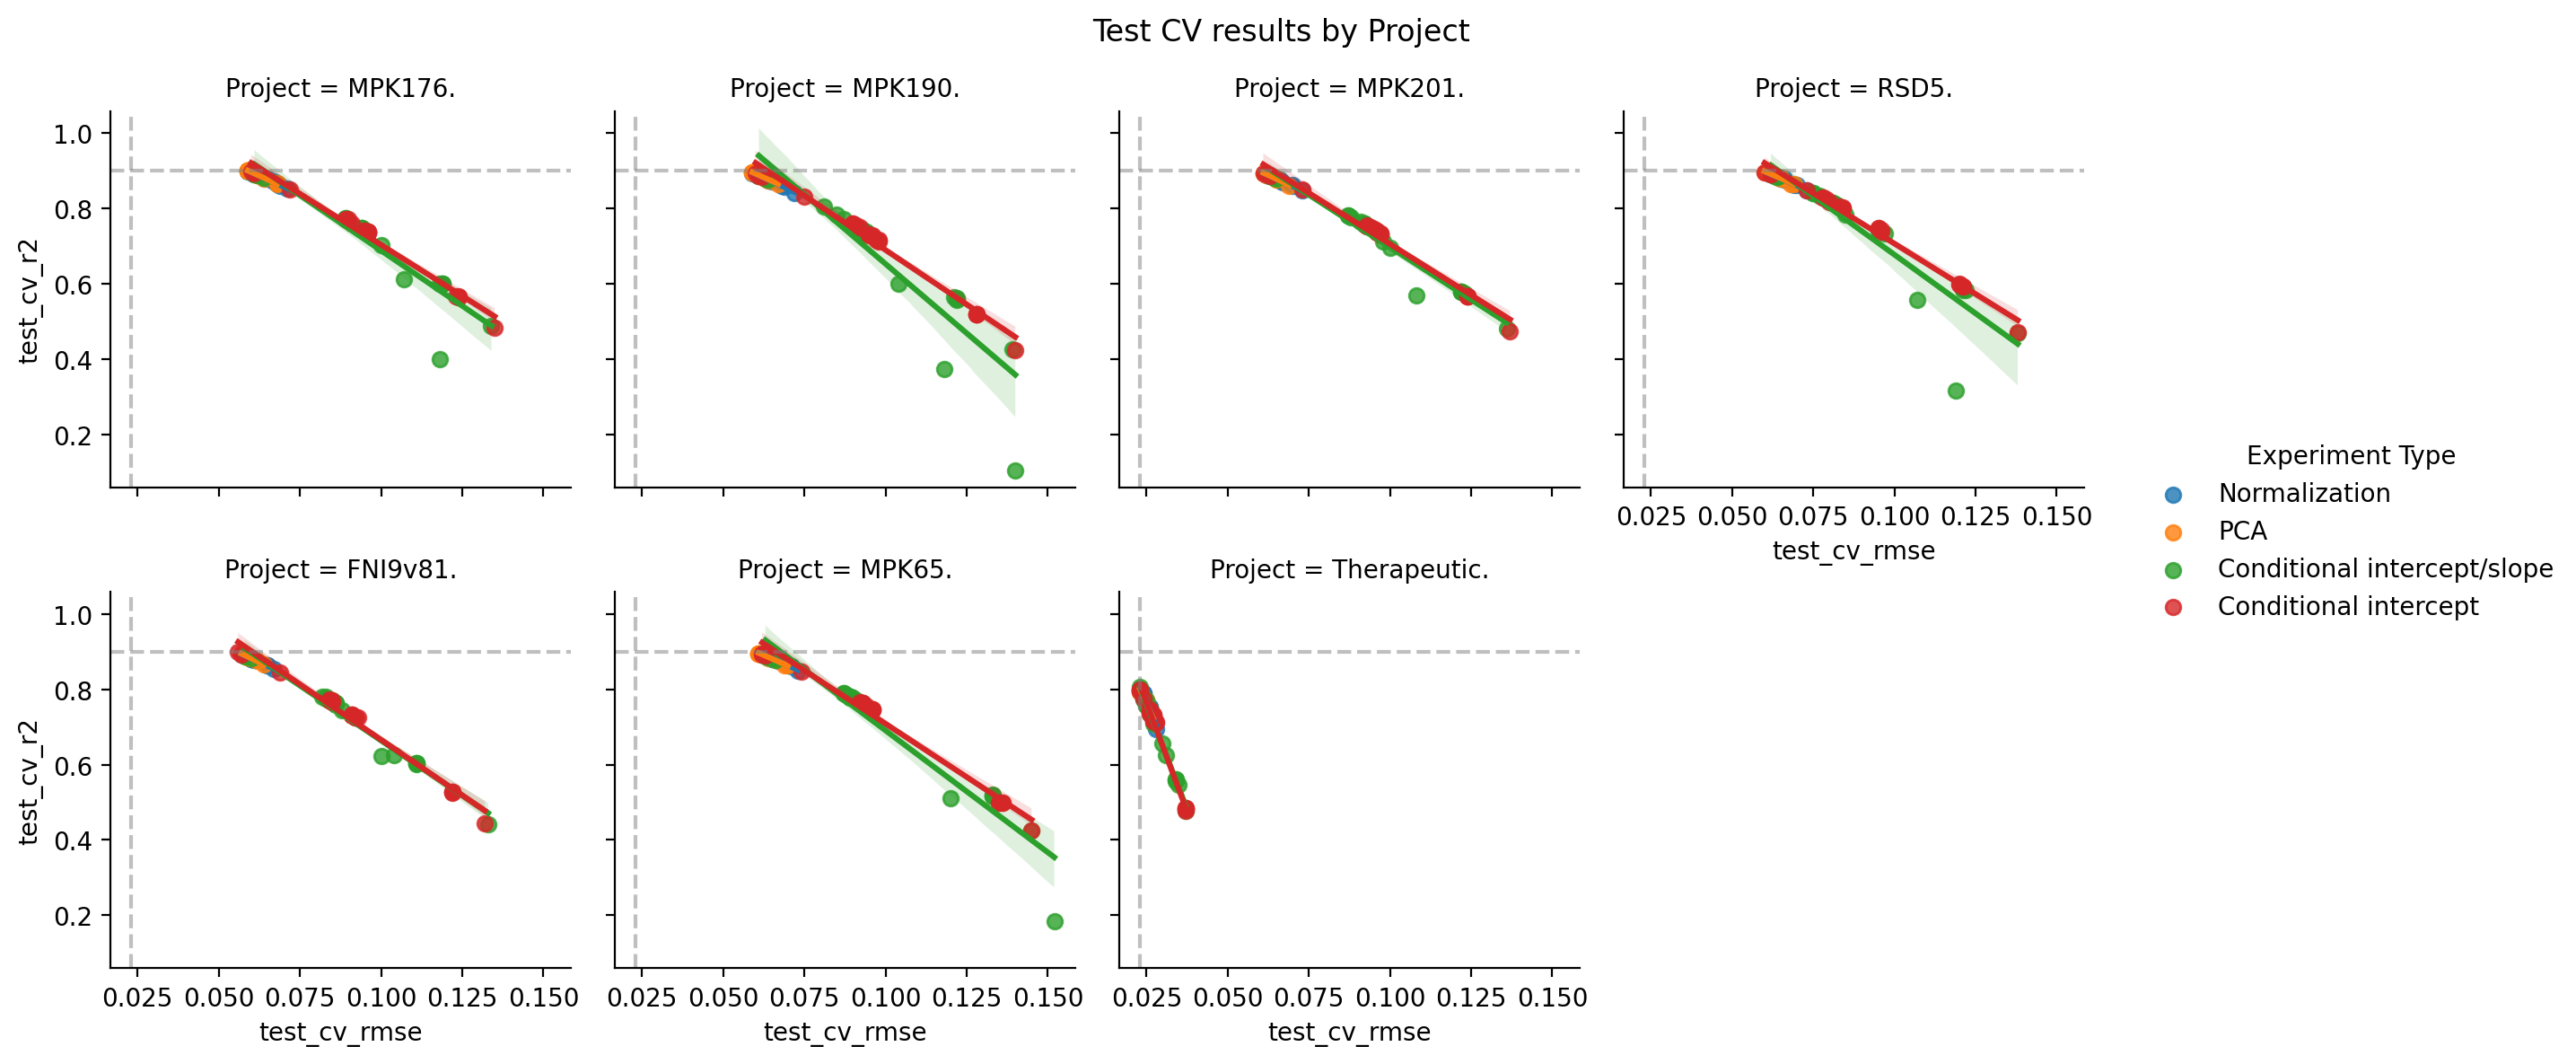

In [6]:
min_rmse=metadata2['test_cv_rmse'].min()
max_r2=metadata2['test_cv_r2'].max()
g = sns.lmplot(data = metadata2, y= 'test_cv_r2', x='test_cv_rmse', hue ='Experiment Type', col = 'Project', col_wrap=4, height=3)
for ax in g.axes.flat: 
    ax.axvline(min_rmse, color = 'grey', linestyle = '--', alpha = 0.5)
    ax.axhline(max_r2, color = 'grey', linestyle = '--', alpha =0.5)

plt.gcf().suptitle('Test CV results by Project')
g.tight_layout()

### Plot boxplots to determine how the different model parameters effect RMSE and R2. 

The parameters I explore are experiment type (feature preprocessing), feature_set (which features) and model type. 

##### Experiment Type

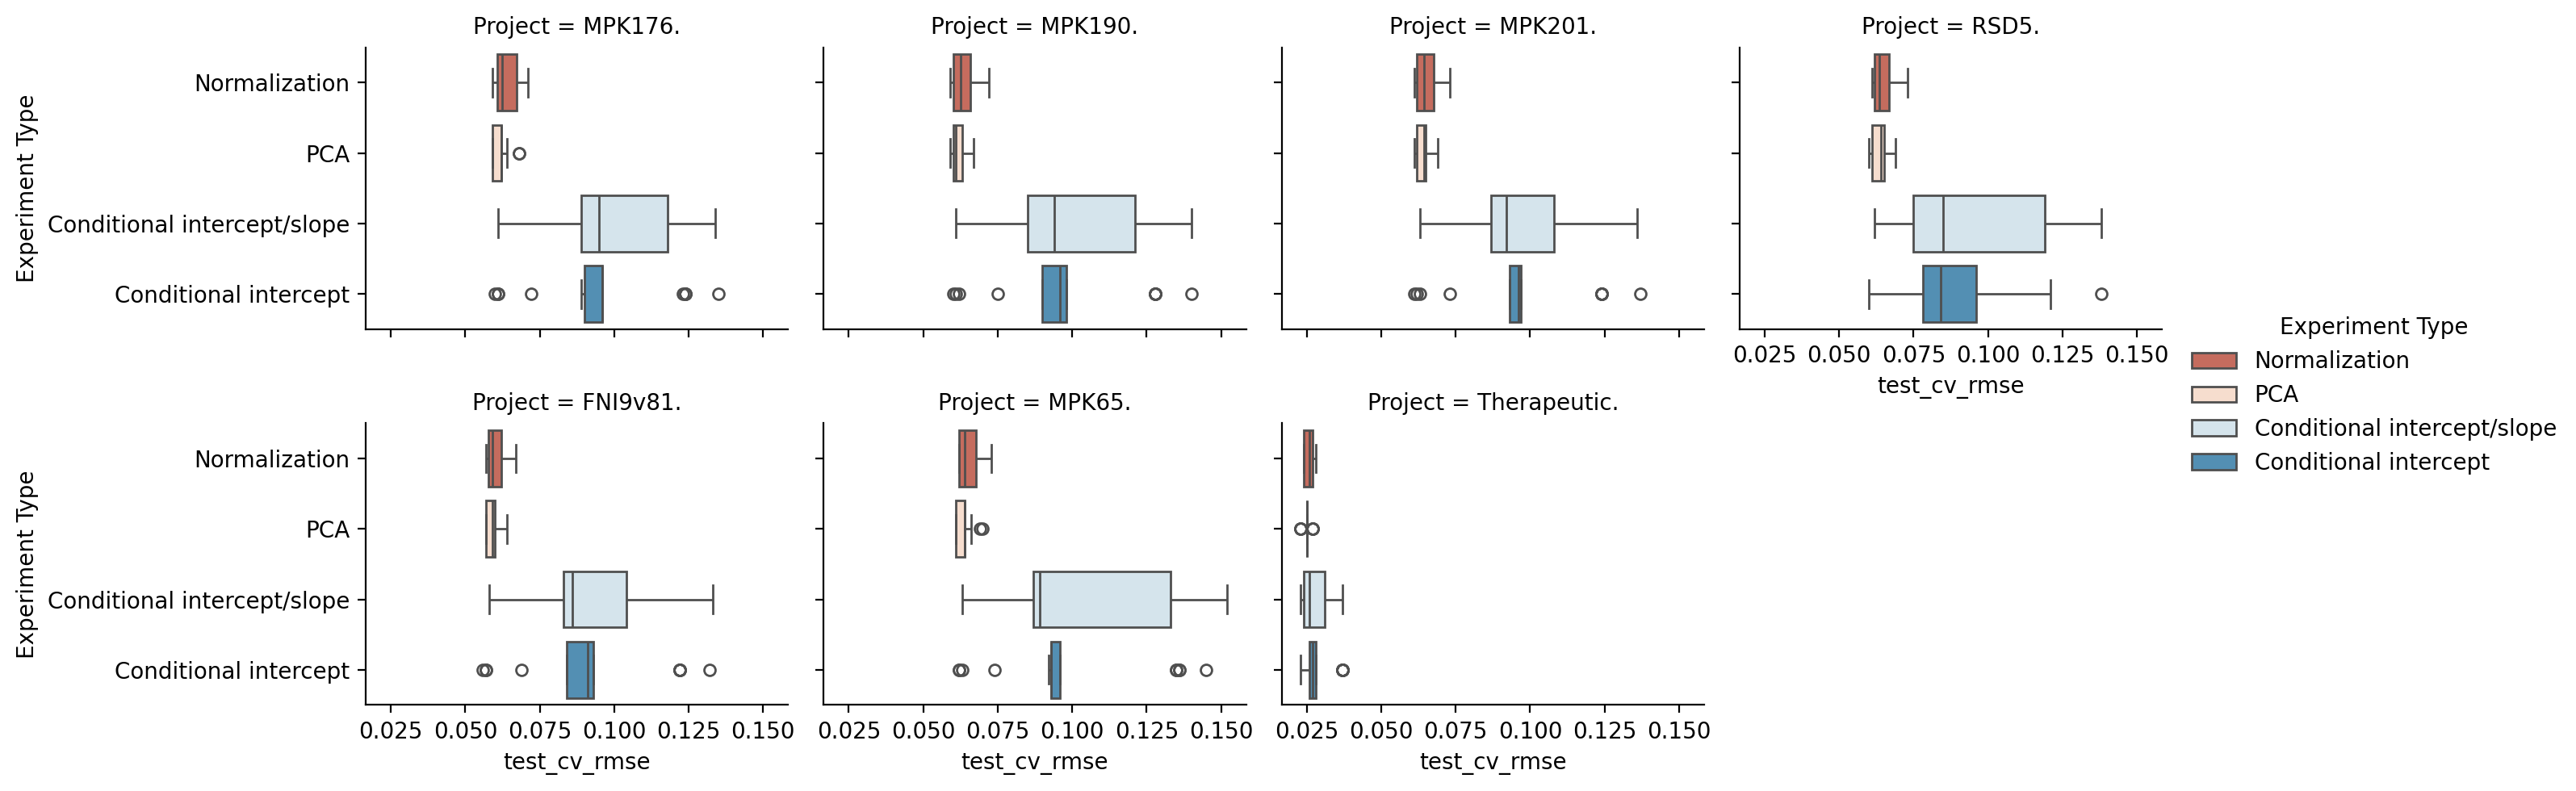

In [7]:
y= 'Experiment Type'
x ='test_cv_rmse' 
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x,y=y, hue=y, palette='RdBu', col ='Project',col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

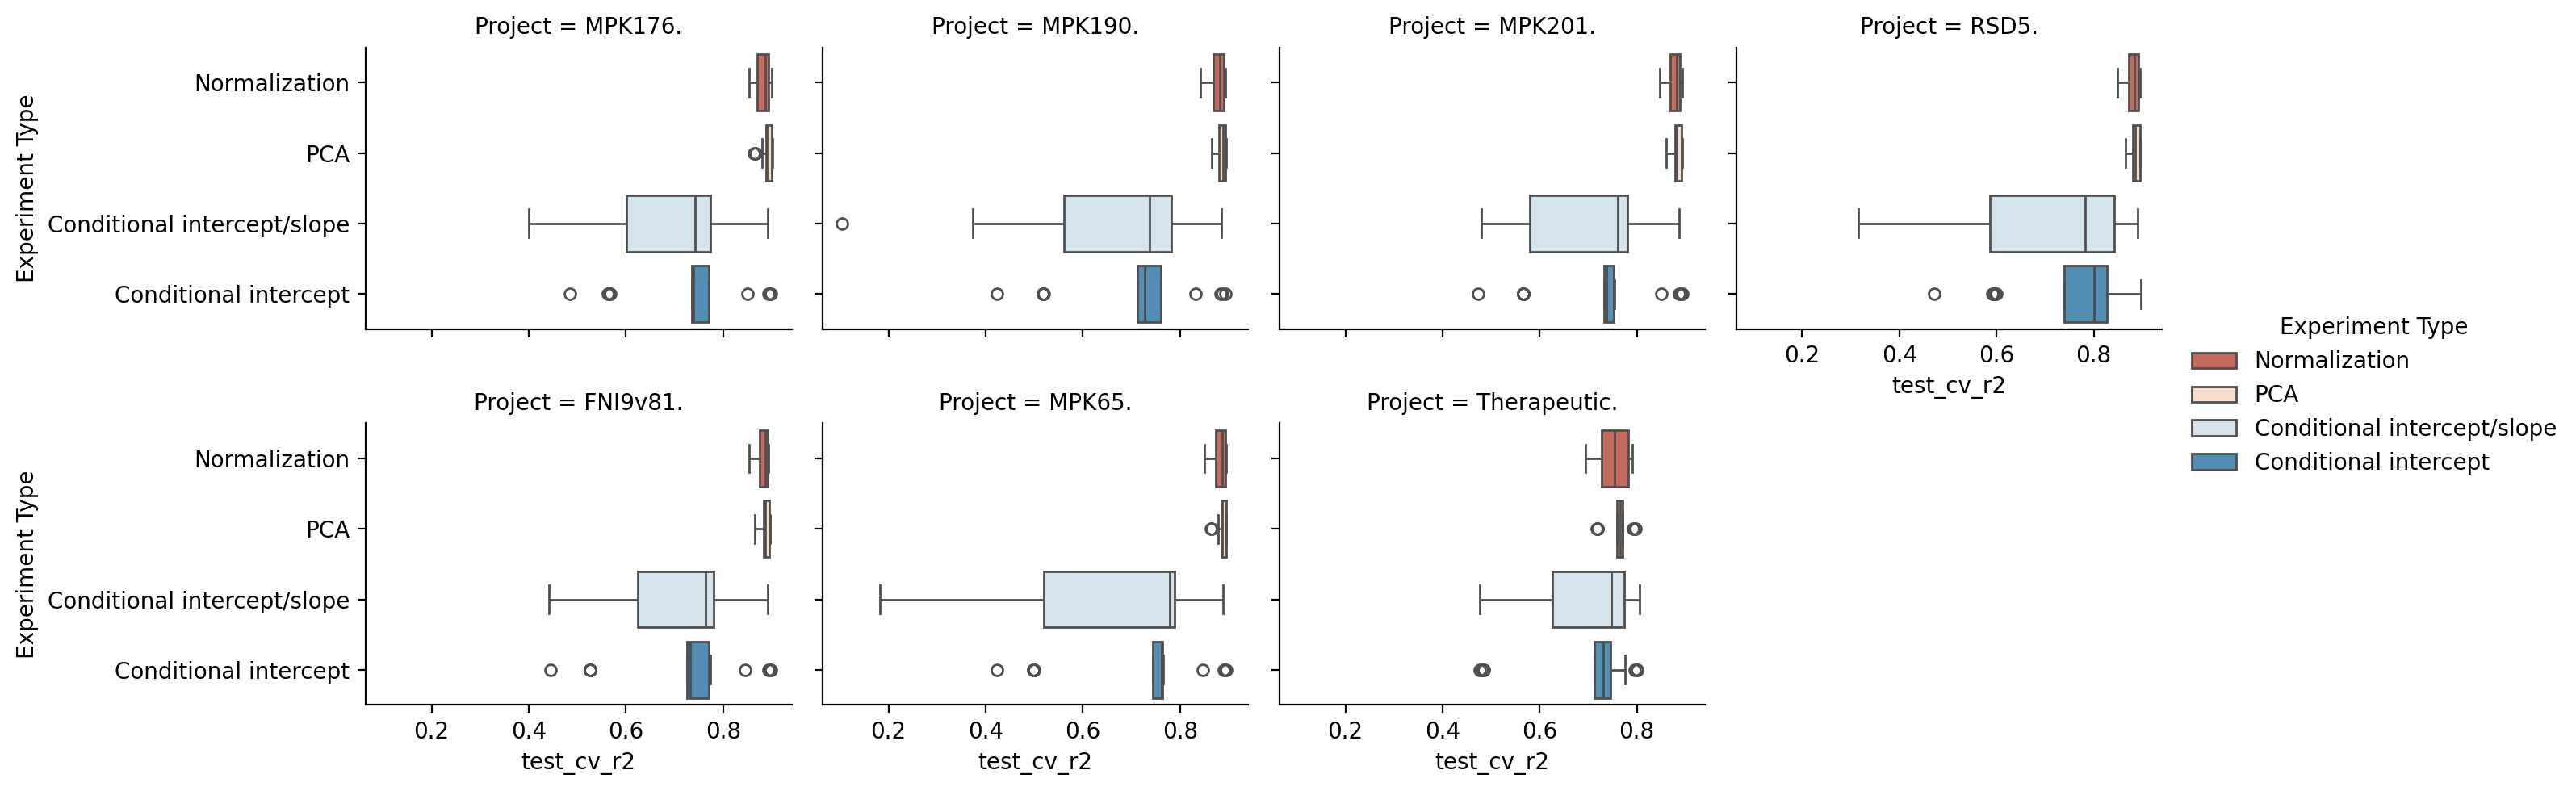

In [8]:
y= 'Experiment Type'
x ='test_cv_r2' 
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box',x=x, y=y, hue=y, palette='RdBu', col ='Project',col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

##### Feature Set

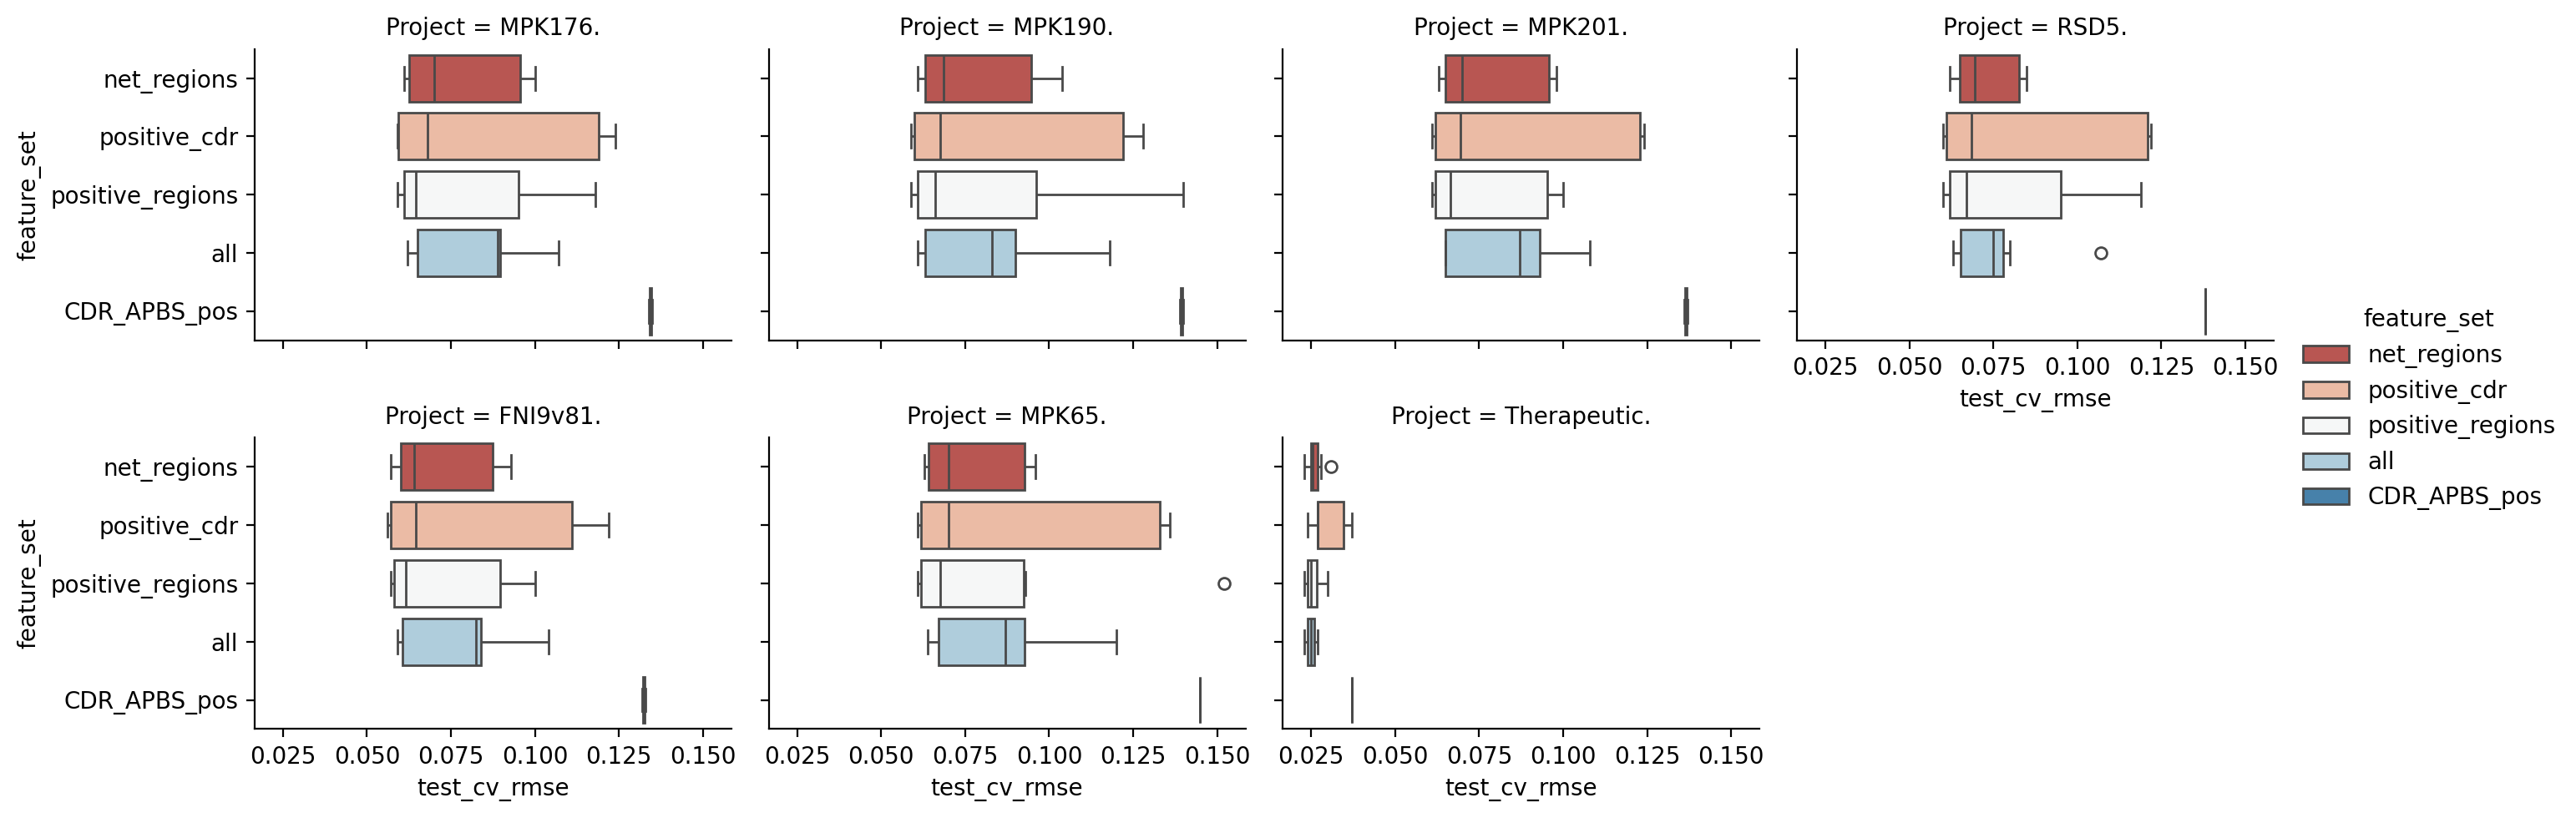

In [9]:
y= 'feature_set'
x ='test_cv_rmse' 
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x, y=y, hue=y, palette='RdBu', col ='Project',col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

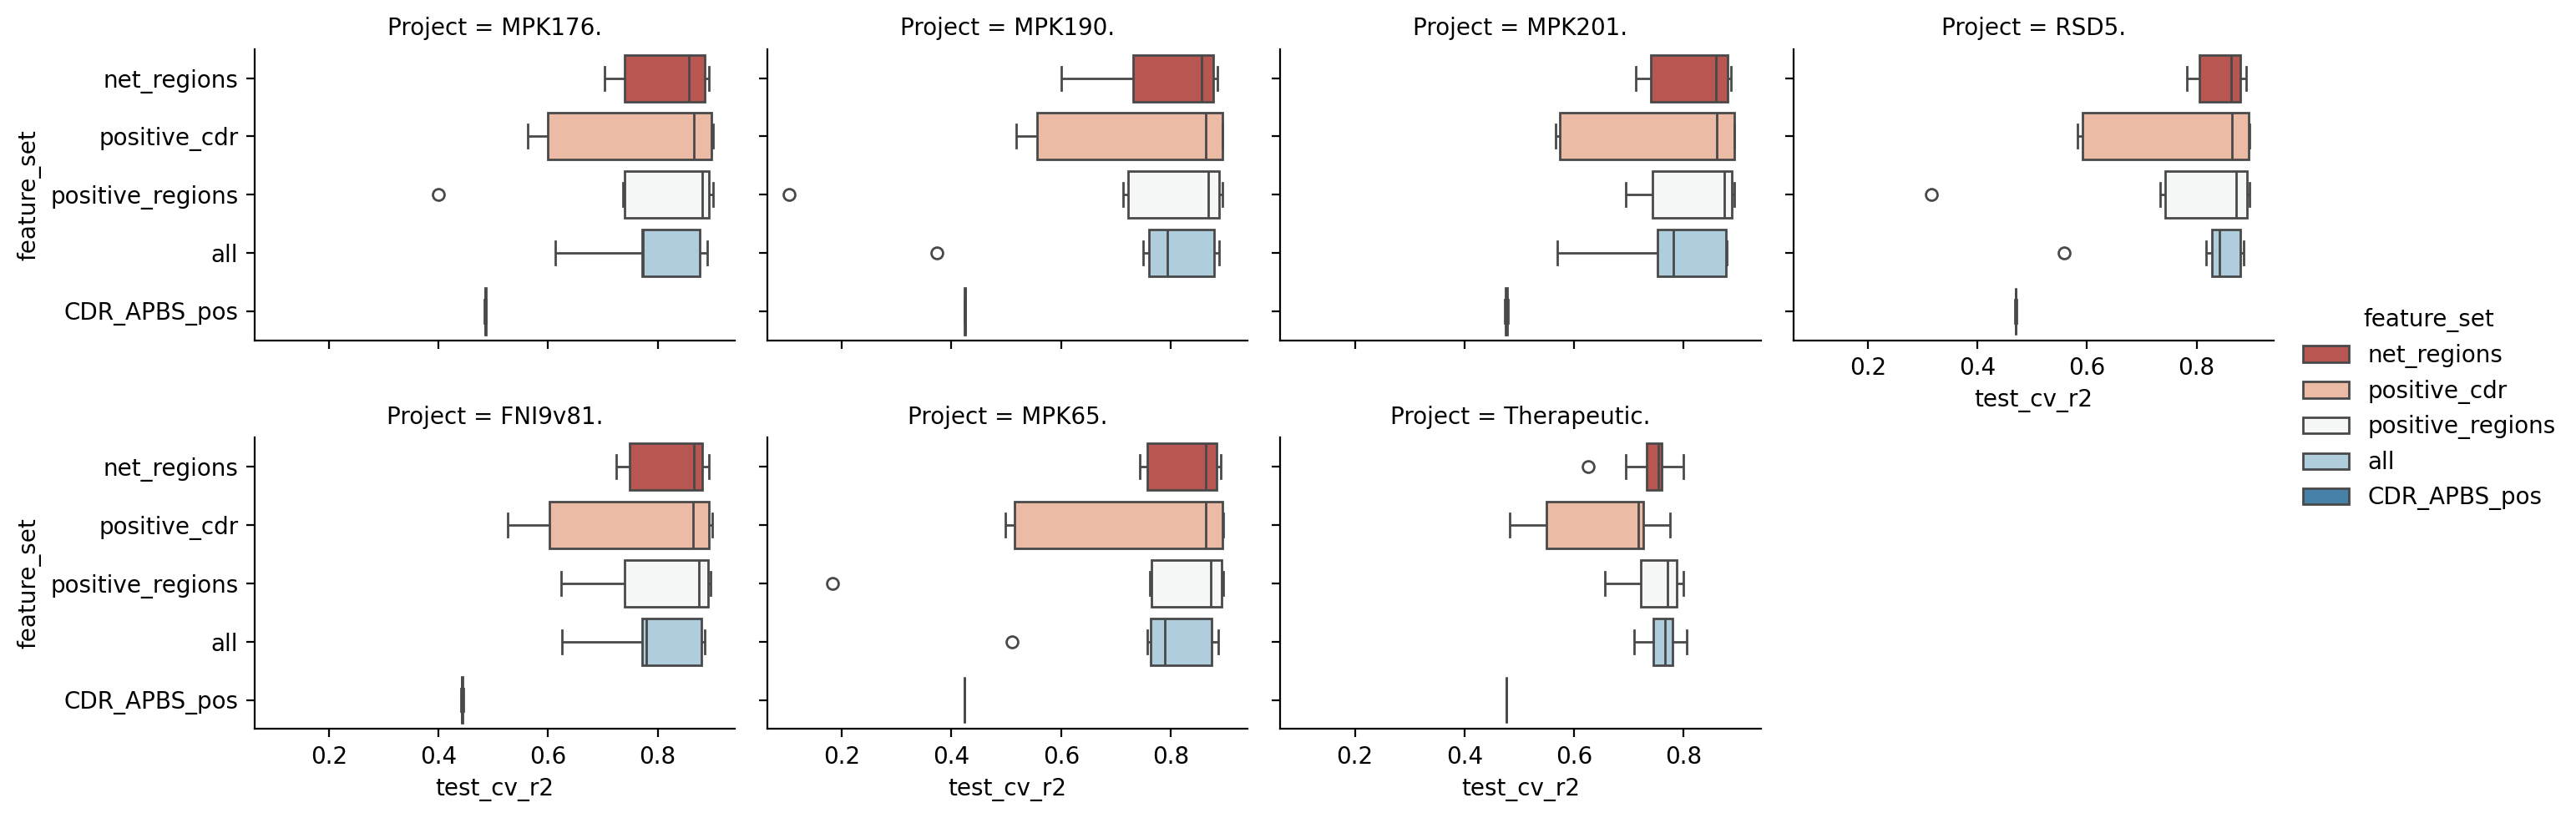

In [10]:
y= 'feature_set'
x ='test_cv_r2' 
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x, y=y, hue=y, palette='RdBu', col ='Project',col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

##### Model Type

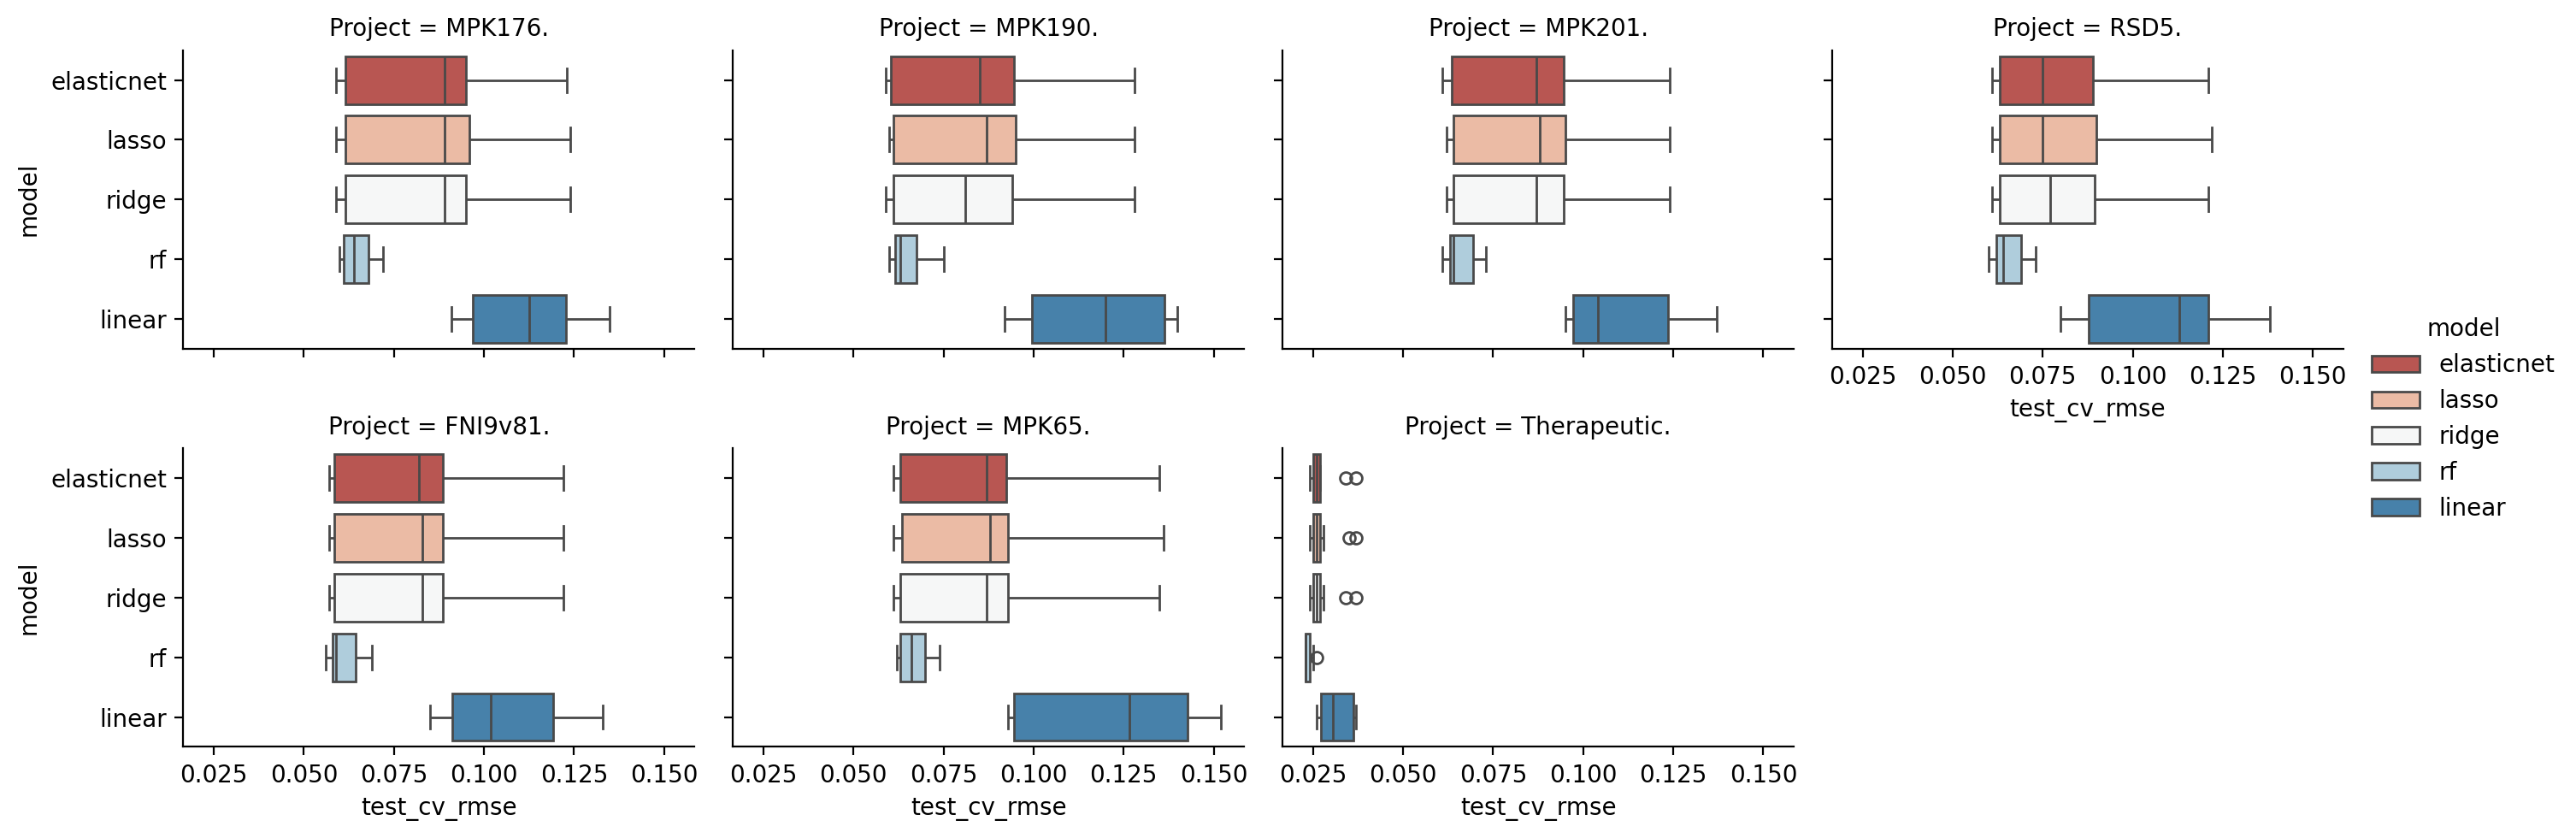

In [11]:
y= 'model'
x ='test_cv_rmse' 
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x, y=y, hue=y, palette='RdBu', col ='Project',col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

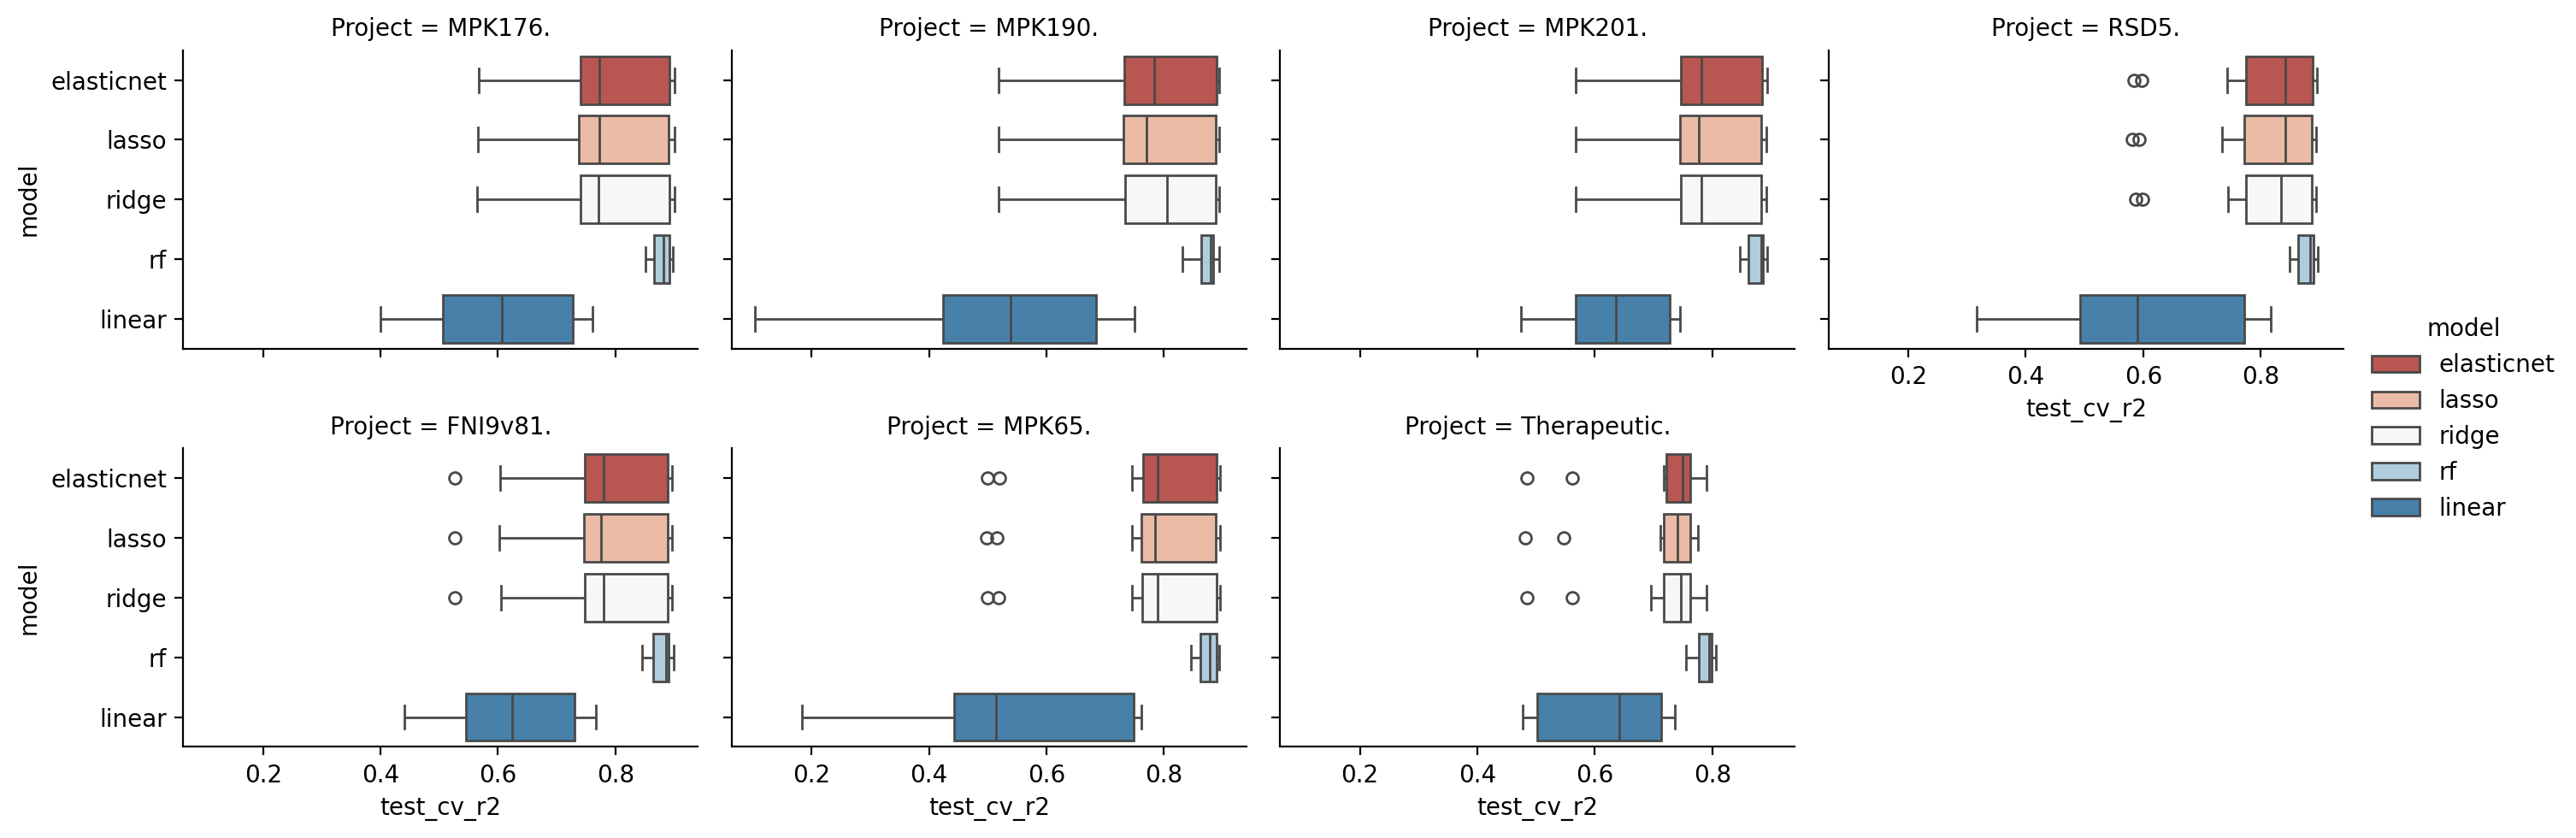

In [12]:
y= 'model'
x ='test_cv_r2' 
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x, y=y, hue=y, palette='RdBu', col ='Project',col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

##### Project
We plot this differently. 

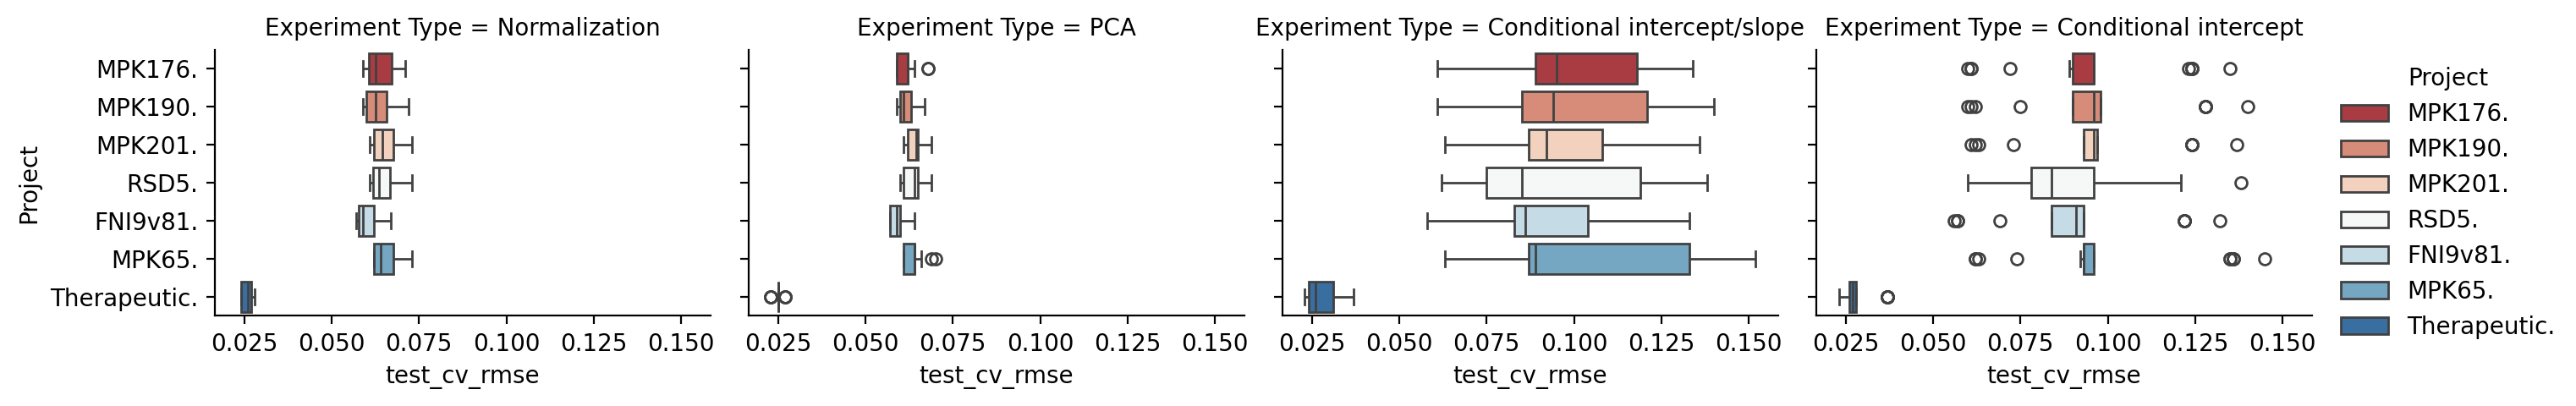

In [13]:
y= 'Project'
x ='test_cv_rmse' 
col = 'Experiment Type'
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x, y=y, hue=y, palette='RdBu', col =col, col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

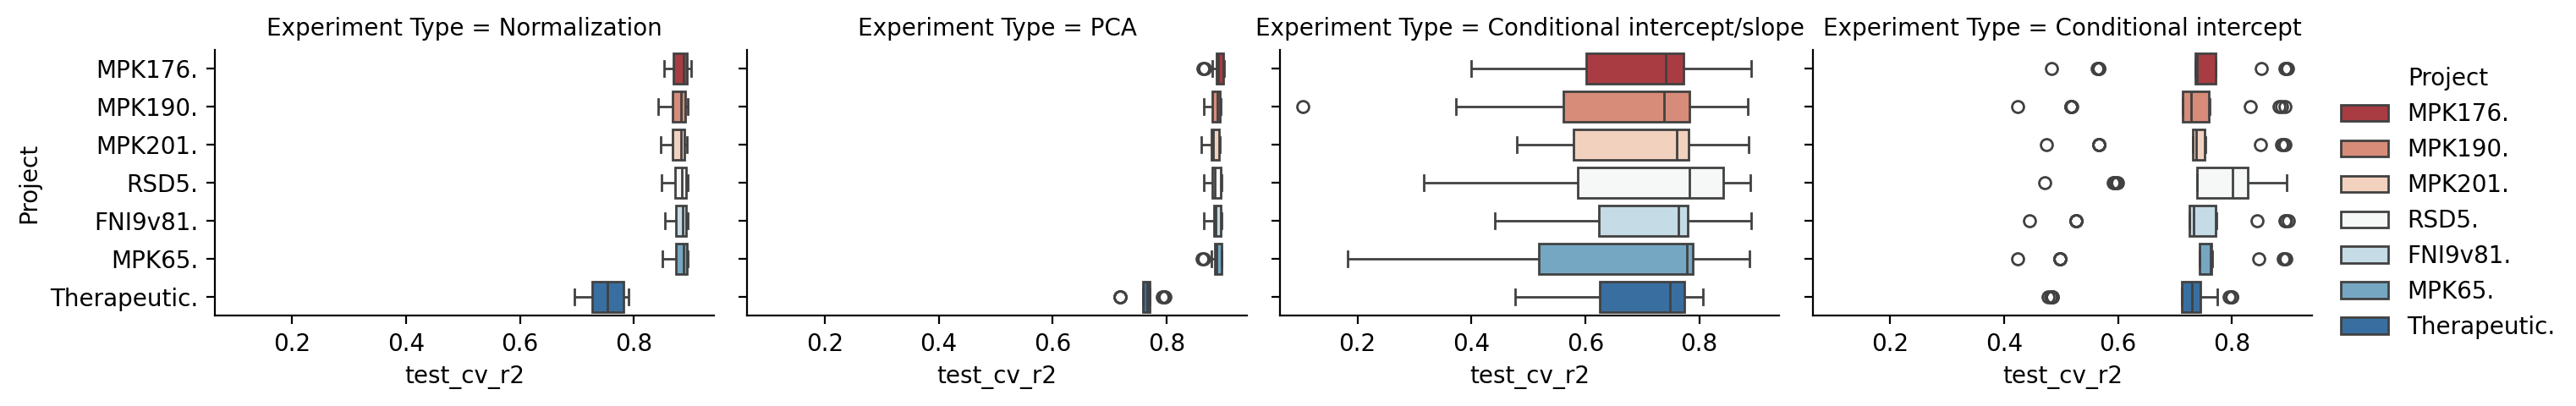

In [14]:
y= 'Project'
x ='test_cv_r2' 
col = 'Experiment Type'
h=2.5
aspect = 1.4
g= sns.catplot(data=metadata2, kind = 'box', x=x, y=y, hue=y, palette='RdBu', col =col, col_wrap = 4, 
               height = h, aspect = aspect, legend=True)

#### Comments: 
From the boxplots above we can make the following conclusions. 
As seen above, performance is affected by the: 
1. The project/dataset not included in training. For the most part, excluding all the internal datasets appears to have minimal effects on the performance. However, removing the Therapeutic antibodies reduces R2 (bad) and reduced RMSE (good). Overall, it would seem that including them is good. Would be better if had the same inhouse scaling. 
2. Experiment Type (feature preprocessing). Either performing PCA or doing Normalization leads to a large improvement in performance. In truth, I also included one-hot-encoding in these. I assume that helps. Consider doing the experiment with no one-hot encoding. Adding a conditional slope hurts. 
3. Feature set. For the most part it seems Positive regions>= CDR pos>=All>total cdr pos.
4. Model type. Overall RF does the overall best, with Lasso, elasticnet, and ridge being roughly the same. However the linear model does the worse by R2 and RMSE. 


### Now calculate results on heldout set. 